<a href="https://colab.research.google.com/github/Vennylts/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1**

In [ ]:
import pandas as pd

df = pd.read_csv('Automobile CSV.csv')

df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


**1.(a)**

In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

data types = float64, int64, object

**1. (b)**

In [ ]:
# categorical statistic
df.describe(include='object')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


In [ ]:
# numerical statistic
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


**1.(c)**

In [ ]:
# Retrieving data from the dataset
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [ ]:
# Replace '?' with NaN (missing value)
import numpy as np

df.replace('?', np.nan, inplace=True)

df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN


In [ ]:
# Identifying the number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Identifying the number of missing values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

7 columns with missing values

In [ ]:
# Handling missing data: fill missing values in columns with the mean values
mean_normalized = df['normalized-losses'].astype('float').mean()
mean_bore = df['bore'].astype('float').mean()
mean_stroke = df['stroke'].astype('float').mean()
mean_horsepower = df['horsepower'].astype('float').mean()
mean_peak = df['peak-rpm'].astype('float').mean()

# Print the updated DataFrame
print(mean_normalized)
print(mean_bore)
print(mean_stroke)
print(mean_horsepower)
print(mean_peak)

122.0
3.3297512437810943
3.255422885572139
104.25615763546799
5125.369458128079


In [ ]:
# Replace missing values with the mean values
df['normalized-losses'].replace(np.nan, mean_normalized, inplace=True)
df['bore'].replace(np.nan, mean_bore, inplace=True)
df['stroke'].replace(np.nan, mean_stroke, inplace=True)
df['horsepower'].replace(np.nan, mean_horsepower, inplace=True)
df['peak-rpm'].replace(np.nan, mean_peak, inplace=True)

df.head()

In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [ ]:
# Finding the mode of categorical value
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [ ]:
# Retrieving the mode directly
df['num-of-doors'].value_counts().idxmax()

'four'

In [ ]:
# Replace the missing value with most frequent value
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

In [ ]:
# Delete rows with missing price data
df.dropna(subset=['price'], axis=0, inplace=True)

In [ ]:
# Make sure there are no more missing values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
# Checking the data types & rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [ ]:
# Changing data types to correct ones
df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']] = df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].astype('float')

# Make sure the data types are corrected
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**1.(d)**

**Turning Categorical Values to Numerical Values (One hot-encoding)**

In [ ]:
# Checking the categorical columns in the dataset
cat = df.select_dtypes(include='O').keys()

print(cat)

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')


In [ ]:
# Finding the number of unique labels in the 'num-of-doors' column
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [ ]:
# Verify the unique labels
df[['num-of-doors']].head(10)

,num-of-doors
0,two
1,two
2,two
3,four
4,four
5,two
6,four
7,four
8,four
10,two


In [ ]:
# Encoding 'num-of-doors' to numerical column
turning_num_of_doors = pd.get_dummies(df['num-of-doors'])

turning_num_of_doors.head(10)

,four,two
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0
5,0,1
6,1,0
7,1,0
8,1,0
10,0,1


In [ ]:
# Concatenating the encoded DataFrame to the original DataFrame
df1 = pd.concat([df, turning_num_of_doors], axis=1)

df1.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,four,two
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,1
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,1
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,1
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,1,0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,1,0
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,0,1
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,1,0
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,1,0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,1,0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0,0,1


In [ ]:
# Dropping the encoded 'num-of-doors' column
df1.drop('num-of-doors', axis = 1, inplace = True)

df1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,four,two
0,3,122.0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,1
1,3,122.0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,1
2,1,122.0,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,1
3,2,164.0,audi,gas,std,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,1,0
4,2,164.0,audi,gas,std,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,1,0


In [ ]:
# Finding the number of unique labels in the 'fuel-type' column
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [ ]:
# Verify the unique labels
df[['fuel-type']].head(10)

,fuel-type
0,gas
1,gas
2,gas
3,gas
4,gas
5,gas
6,gas
7,gas
8,gas
10,gas


In [ ]:
# Encoding 'fuel-type' to numerical column
turning_fuel_type = pd.get_dummies(df['fuel-type'])

turning_fuel_type.head(10)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
10,0,1


In [ ]:
# Concatenating the encoded DataFrame to the original DataFrame
df2 = pd.concat([df1, turning_fuel_type], axis=1)

df2.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,four,two,diesel,gas
0,3,122.0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,...,9.0,111.0,5000.0,21,27,13495.0,0,1,0,1
1,3,122.0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,...,9.0,111.0,5000.0,21,27,16500.0,0,1,0,1
2,1,122.0,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,...,9.0,154.0,5000.0,19,26,16500.0,0,1,0,1
3,2,164.0,audi,gas,std,sedan,fwd,front,99.8,176.6,...,10.0,102.0,5500.0,24,30,13950.0,1,0,0,1
4,2,164.0,audi,gas,std,sedan,4wd,front,99.4,176.6,...,8.0,115.0,5500.0,18,22,17450.0,1,0,0,1
5,2,122.0,audi,gas,std,sedan,fwd,front,99.8,177.3,...,8.5,110.0,5500.0,19,25,15250.0,0,1,0,1
6,1,158.0,audi,gas,std,sedan,fwd,front,105.8,192.7,...,8.5,110.0,5500.0,19,25,17710.0,1,0,0,1
7,1,122.0,audi,gas,std,wagon,fwd,front,105.8,192.7,...,8.5,110.0,5500.0,19,25,18920.0,1,0,0,1
8,1,158.0,audi,gas,turbo,sedan,fwd,front,105.8,192.7,...,8.3,140.0,5500.0,17,20,23875.0,1,0,0,1
10,2,192.0,bmw,gas,std,sedan,rwd,front,101.2,176.8,...,8.8,101.0,5800.0,23,29,16430.0,0,1,0,1


In [ ]:
# Dropping the encoded 'fuel-type' column
df2.drop('fuel-type', axis = 1, inplace = True)

df2.head()

,symboling,normalized-losses,make,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,four,two,diesel,gas
0,3,122.0,alfa-romero,std,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111.0,5000.0,21,27,13495.0,0,1,0,1
1,3,122.0,alfa-romero,std,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111.0,5000.0,21,27,16500.0,0,1,0,1
2,1,122.0,alfa-romero,std,hatchback,rwd,front,94.5,171.2,65.5,...,9.0,154.0,5000.0,19,26,16500.0,0,1,0,1
3,2,164.0,audi,std,sedan,fwd,front,99.8,176.6,66.2,...,10.0,102.0,5500.0,24,30,13950.0,1,0,0,1
4,2,164.0,audi,std,sedan,4wd,front,99.4,176.6,66.4,...,8.0,115.0,5500.0,18,22,17450.0,1,0,0,1


In [ ]:
df2.to_csv('cleaned_automobile.csv')

In [ ]:
import pandas as pd

df = pd.read_csv('cleaned_automobile.csv')

df.head(10)

,Unnamed: 0,symboling,normalized-losses,make,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,four,two,diesel,gas
0,0,3,122.0,alfa-romero,std,convertible,rwd,front,88.6,168.8,...,9.0,111.0,5000.0,21,27,13495.0,0,1,0,1
1,1,3,122.0,alfa-romero,std,convertible,rwd,front,88.6,168.8,...,9.0,111.0,5000.0,21,27,16500.0,0,1,0,1
2,2,1,122.0,alfa-romero,std,hatchback,rwd,front,94.5,171.2,...,9.0,154.0,5000.0,19,26,16500.0,0,1,0,1
3,3,2,164.0,audi,std,sedan,fwd,front,99.8,176.6,...,10.0,102.0,5500.0,24,30,13950.0,1,0,0,1
4,4,2,164.0,audi,std,sedan,4wd,front,99.4,176.6,...,8.0,115.0,5500.0,18,22,17450.0,1,0,0,1
5,5,2,122.0,audi,std,sedan,fwd,front,99.8,177.3,...,8.5,110.0,5500.0,19,25,15250.0,0,1,0,1
6,6,1,158.0,audi,std,sedan,fwd,front,105.8,192.7,...,8.5,110.0,5500.0,19,25,17710.0,1,0,0,1
7,7,1,122.0,audi,std,wagon,fwd,front,105.8,192.7,...,8.5,110.0,5500.0,19,25,18920.0,1,0,0,1
8,8,1,158.0,audi,turbo,sedan,fwd,front,105.8,192.7,...,8.3,140.0,5500.0,17,20,23875.0,1,0,0,1
9,10,2,192.0,bmw,std,sedan,rwd,front,101.2,176.8,...,8.8,101.0,5800.0,23,29,16430.0,0,1,0,1


**Question 2**

**Correlation Coefficient**

In [ ]:
# Assuming 'price' is the dependent variable and the independent variables are stored in a DataFrame called 'df'

# Calculate the correlation coefficients
correlation_coefficients = df.corr()['price']

# Display the correlation coefficients
print(correlation_coefficients)


Unnamed: 0          -0.117889
symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082269
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
four                 0.042435
two                 -0.042435
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64


<ipython-input-33-880137e00c77>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_coefficients = df.corr()['price']


In [ ]:
# Listing the highest correlation to price
correlation = df.corr()['price']  # Compute correlation with the 'price' column
correlation = correlation.abs().sort_values(ascending=False)  # Sort correlation values by absolute magnitude
top_variables = correlation[1:]  # Exclude the 'price' column itself

print(top_variables)

engine-size          0.872335
curb-weight          0.834415
horsepower           0.809575
width                0.751265
highway-mpg          0.704692
length               0.690628
city-mpg             0.686571
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
Unnamed: 0           0.117889
diesel               0.110326
gas                  0.110326
peak-rpm             0.101616
symboling            0.082391
stroke               0.082269
compression-ratio    0.071107
four                 0.042435
two                  0.042435
Name: price, dtype: float64


<ipython-input-34-27a80de6634b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['price']  # Compute correlation with the 'price' column


**Question 3**

<ipython-input-35-4e8f23e533d8>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


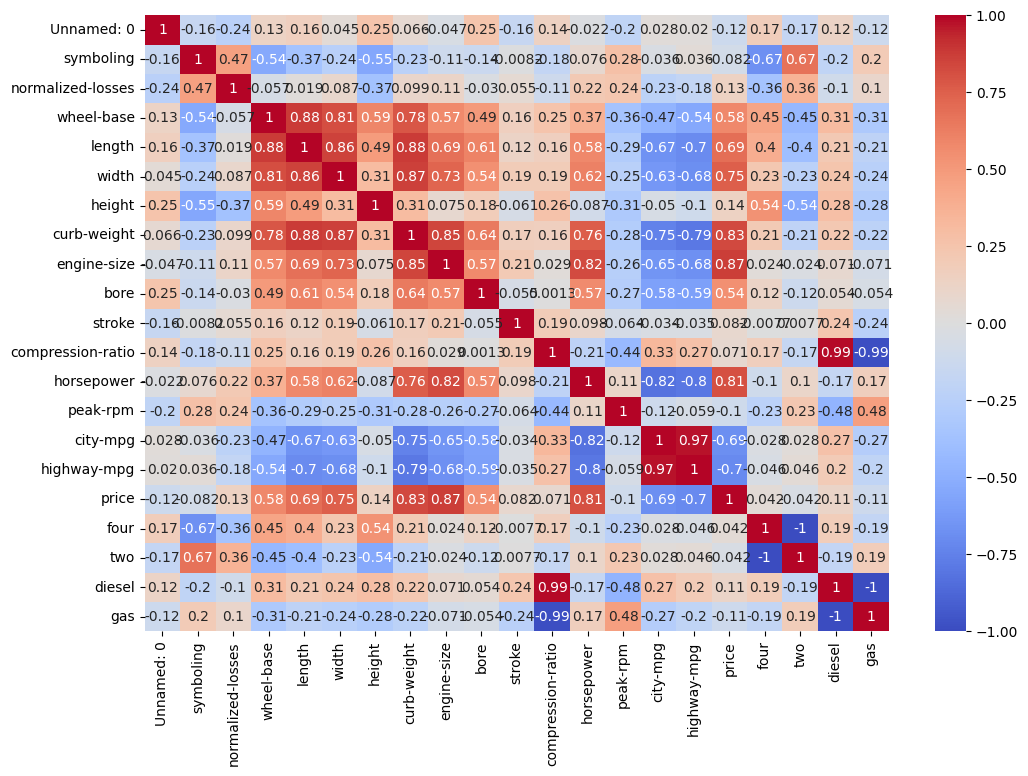

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'price' is the dependent variable and the independent variables are stored in a DataFrame called 'df'

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
df.rename(columns={'engine-size': 'engine_size'}, inplace=True)

print(df.columns)

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'aspiration',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine_size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'four',
       'two', 'diesel', 'gas'],
      dtype='object')


**Question 4**

In [ ]:
# Splitting training and testing set
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [ ]:
# Fitting a Linear Regression model for Engine Size as x-variable
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['engine_size']])
train_y = np.asanyarray(train[['price']])
regr.fit (train_x, train_y)

# The coefficients and interception
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[167.57183645]]
Intercept:  [-7924.0279041]


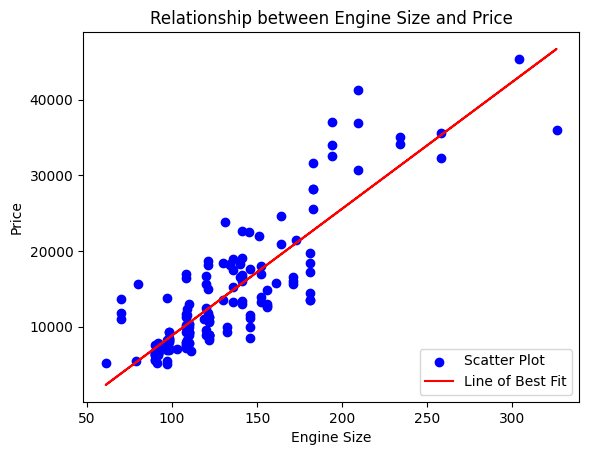

In [ ]:
# Plottiing a Regression model for Engine Size as x-variable
plt.scatter(train.engine_size, train.price, color='blue', label = 'Scatter Plot')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label = 'Line of Best Fit') #-r is for the colour of the line
plt.title('Relationship between Engine Size and Price')
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.legend(loc=4)

In [ ]:
# Calculating the evaluation metrics between Engine Size and Price
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['engine_size']])
test_y = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)

print('Engine size as x-variable:')
print(" ")
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(np.mean((test_y_ - test_y) ** 2)))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Engine size as x-variable:
 
Mean absolute error: 2107.32
Residual sum of squares (MSE): 6960223.81
Root Mean Squared Error (RMSE): 2638.22
R2-score: 0.83


In [ ]:
# Making prediction of price based on the engine size
engine_size = 250
price_pred = regr.predict([[engine_size]])

print('The price is: ', price_pred[0])

The price is:  [33968.93120898]


**Question 5**

In [ ]:
# Fitting a Linear Regression model for Horsepower as x-variable
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['horsepower']])
train_y = np.asanyarray(train[['price']])
regr.fit (train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[170.99001324]]
Intercept:  [-4414.50857909]


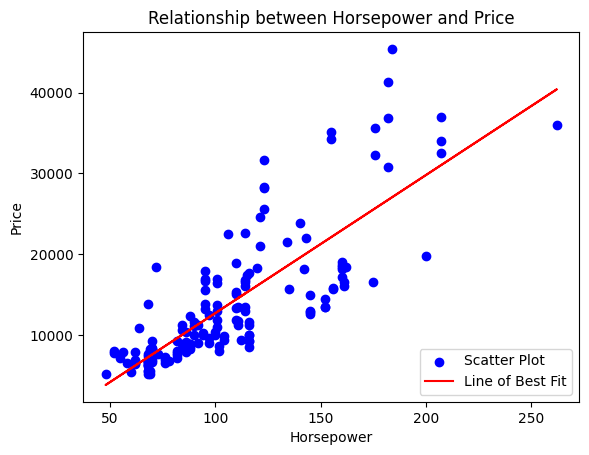

In [ ]:
# Plottiing a Regression model for Horsepower as x-variable
plt.scatter(train.horsepower, train.price,  color='blue', label = 'Scatter Plot')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label = 'Line of Best Fit') #-r is for the colour of the line
plt.title('Relationship between Horsepower and Price')
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.legend(loc=4)

In [ ]:
# Calculating the evaluation metrics between Horsepower and Price
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['horsepower']])
test_y = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)

print("Horspower as x-variable:")
print(" ")
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(np.mean((test_y_ - test_y) ** 2)))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Horspower as x-variable:
 
Mean absolute error: 2775.74
Residual sum of squares (MSE): 14330484.23
Root Mean Squared Error (RMSE): 3785.56
R2-score: 0.65


In [ ]:
# Making prediction of price based on the horsepower
horsepower = 205
price_pred = regr.predict([[horsepower]])

print('The price is: ', price_pred[0])

The price is:  [30638.44413465]
